In [1]:
#%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the result
percp_data=pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > '2016-08-23').all())
percp_data

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


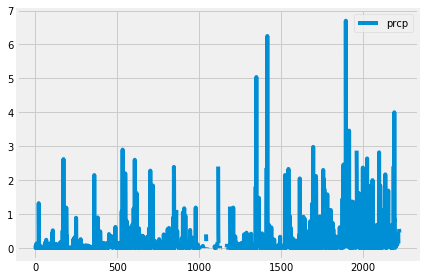

In [11]:

# Sort the dataframe by date
percp_data.sort_values(by=['date'])



# Use Pandas Plotting with Matplotlib to plot the data
percp_data.plot()
plt.tight_layout()
plt.show()



In [12]:
percp_data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
engine.execute('SELECT COUNT(station) FROM station').fetchall()

[(9,)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.


# First Method

#active_station=engine.execute('SELECT station, COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC').fetchall()
                

#active_station

# Second Method
active_station= session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

print("Active Stations in Descending Order")
print(active_station)

c=0

for observations in active_station:
    if observations[1] > c:
        c=observations[1]
        max_station=observations[0]
print("-----------------------------------------------------------")

print("The Station with maximum observations is " + max_station + " With "+str(c) + " Observations")
        
    
    


Active Stations in Descending Order
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
-----------------------------------------------------------
The Station with maximum observations is USC00519281 With 2772 Observations


In [15]:
temp_data=pd.DataFrame(session.query(Measurement.station,Measurement.date, Measurement.tobs).\
                        filter(Measurement.date > '2016-08-23').all())
temp_data=temp_data.rename(columns={"tobs":"temperature"})
temp_data

,station,date,temperature
0,USC00519397,2016-08-24,79.0
1,USC00519397,2016-08-25,80.0
2,USC00519397,2016-08-26,79.0
3,USC00519397,2016-08-27,77.0
4,USC00519397,2016-08-28,78.0
5,USC00519397,2016-08-29,78.0
6,USC00519397,2016-08-30,79.0
7,USC00519397,2016-08-31,80.0
8,USC00519397,2016-09-01,81.0
9,USC00519397,2016-09-02,80.0


In [16]:
#highest_station_data=session.query(Measurement.station, Measurement.tobs).filter_by(station=max_station).count()
#highest_station_data
highest_station_data=pd.DataFrame(session.query(Measurement.station,Measurement.date, Measurement.tobs).\
                        filter(Measurement.date > '2017-08-06').\
                        filter(Measurement.station == max_station).all())
highest_station_data=highest_station_data.rename(columns={"tobs":"temperature"})
highest_station_data

,station,date,temperature
0,USC00519281,2017-08-13,77.0
1,USC00519281,2017-08-14,77.0
2,USC00519281,2017-08-15,77.0
3,USC00519281,2017-08-16,76.0
4,USC00519281,2017-08-17,76.0
5,USC00519281,2017-08-18,79.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C273FF898>]],
      dtype=object)

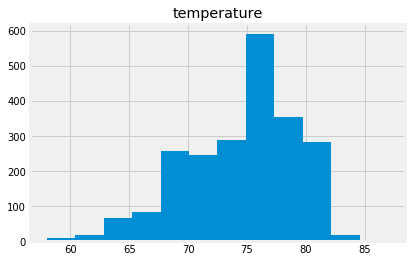

In [17]:
 temp_data.hist(column='temperature', bins=12)